In [19]:
%matplotlib 

import h5py
import mne
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

Using matplotlib backend: Qt5Agg


# Load hdf5 file

In [103]:
subject = '01'
session = '01'

filename = '/Users/the_m/Desktop/10.12751_g-node.d76994/data_nix/Data_Subject_%s_Session_%s.h5' % (subject, session)
f = h5py.File(filename, 'r')

In [104]:
print(f.keys())
print(f['metadata'].keys())
print(f['data'].keys())

<KeysViewHDF5 ['data', 'metadata']>
<KeysViewHDF5 ['General', 'Task', 'Subject', 'Session']>
<KeysViewHDF5 ['Data_Subject_01_Session_01']>


# Get datasets in hdf5 file

In [105]:
def visitor_func(name, node):
    if isinstance(node, h5py.Dataset):
         datasetList.append(node.name)
    else:
         groupList.append(node.name)
            
datasetList = []
groupList = []
f.visititems(visitor_func)

data = [i for i in datasetList if i.startswith('/data')]
metadata = [i for i in datasetList if i.startswith('/metadata')]

# Data names

In [106]:
for i in data:
    print(i)

/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_01/data
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_01/dimensions/1/labels
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_02/data
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_02/dimensions/1/labels
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_03/data
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_03/dimensions/1/labels
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_04/data
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_04/dimensions/1/labels
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_05/data
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_05/dimensions/1/labels
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_06/data
/data/Data_Subject_01_Session_01/data_arrays/Scalp_EEG_Data_Trial_06/dimensions/1/labels
/data/Data_Subject_01_

/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/2931d9af-2a63-4b61-9018-b0df266ee245/extent
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/2931d9af-2a63-4b61-9018-b0df266ee245/position
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/2931d9af-2a63-4b61-9018-b0df266ee245/units
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/29ca8701-1c26-4c25-a797-2ebbed2ed846/extent
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/29ca8701-1c26-4c25-a797-2ebbed2ed846/position
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/29ca8701-1c26-4c25-a797-2ebbed2ed846/units
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/2a873293-fee0-42f1-8d43-903e94b4372c/extent
/data/Data_Subject_01_Session_01/groups/Trial events single tags scalp EEG/tags/2a873293-fee0-42f1-8d43-903e94b4372c/position
/dat

# Metadata names

In [107]:
for i in metadata:
    print(i)

/metadata/General/properties/Institution
/metadata/General/properties/Recording location
/metadata/General/sections/Recording setup/properties/Recording setup EEG
/metadata/General/sections/Recording setup/properties/Recording setup iEEG
/metadata/General/sections/Related publications/properties/Publication DOI
/metadata/General/sections/Related publications/properties/Publication name
/metadata/Session/properties/Number of trials
/metadata/Session/properties/Trial duration
/metadata/Session/sections/Trial properties/sections/Trial_01/properties/Artifact
/metadata/Session/sections/Trial properties/sections/Trial_01/properties/Correct
/metadata/Session/sections/Trial properties/sections/Trial_01/properties/Match
/metadata/Session/sections/Trial properties/sections/Trial_01/properties/Probe letter
/metadata/Session/sections/Trial properties/sections/Trial_01/properties/Response
/metadata/Session/sections/Trial properties/sections/Trial_01/properties/Response time
/metadata/Session/sectio

# Plot electrode coordinates in 3d

In [108]:
key = '/data/Data_Subject_%s_Session_%s/data_arrays/Scalp_Electrode_EEGLAB_BESA_Coordinates/data' % (subject, session)
scalpCoordinates = f[key][:]

key = '/data/Data_Subject_%s_Session_%s/data_arrays/iEEG_Electrode_MNI_Coordinates/data' % (subject, session)
depthCoordinates = f[key][:]

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = depthCoordinates[:,0]
y = depthCoordinates[:,1]
z = depthCoordinates[:,2]

ax.scatter(x, y, z, c='b', marker='o')

x = scalpCoordinates[:,0]
y = scalpCoordinates[:,1]
z = scalpCoordinates[:,2]

ax.scatter(x, y, z, c='r', marker='o')

plt.show()

Channels marked as bad: ['mAHL7']
Channels marked as bad: none


# Load trial data for iEEG or scalp EEG

In [112]:
trialNum = '01'
scalp = False

if scalp:
    trialString = '/data/Data_Subject_%s_Session_%s/data_arrays/Scalp_EEG_Data_Trial_%s' % (subject, session, trialNum)
    sfreq = 200
else:
    trialString = '/data/Data_Subject_%s_Session_%s/data_arrays/iEEG_Data_Trial_%s' % (subject, session, trialNum)
    sfreq = 2000


data = trialString + '/data'
labels = trialString + '/dimensions/1/labels'

rawArray = np.array(f[data])
columns = [i.decode('UTF-8') for i in list(f[labels])]

info = mne.create_info(ch_names=columns, sfreq=sfreq)
raw = mne.io.RawArray(data=rawArray, info=info)

Creating RawArray with float64 data, n_channels=48, n_times=16000
    Range : 0 ... 15999 =      0.000 ...     8.000 secs
Ready.


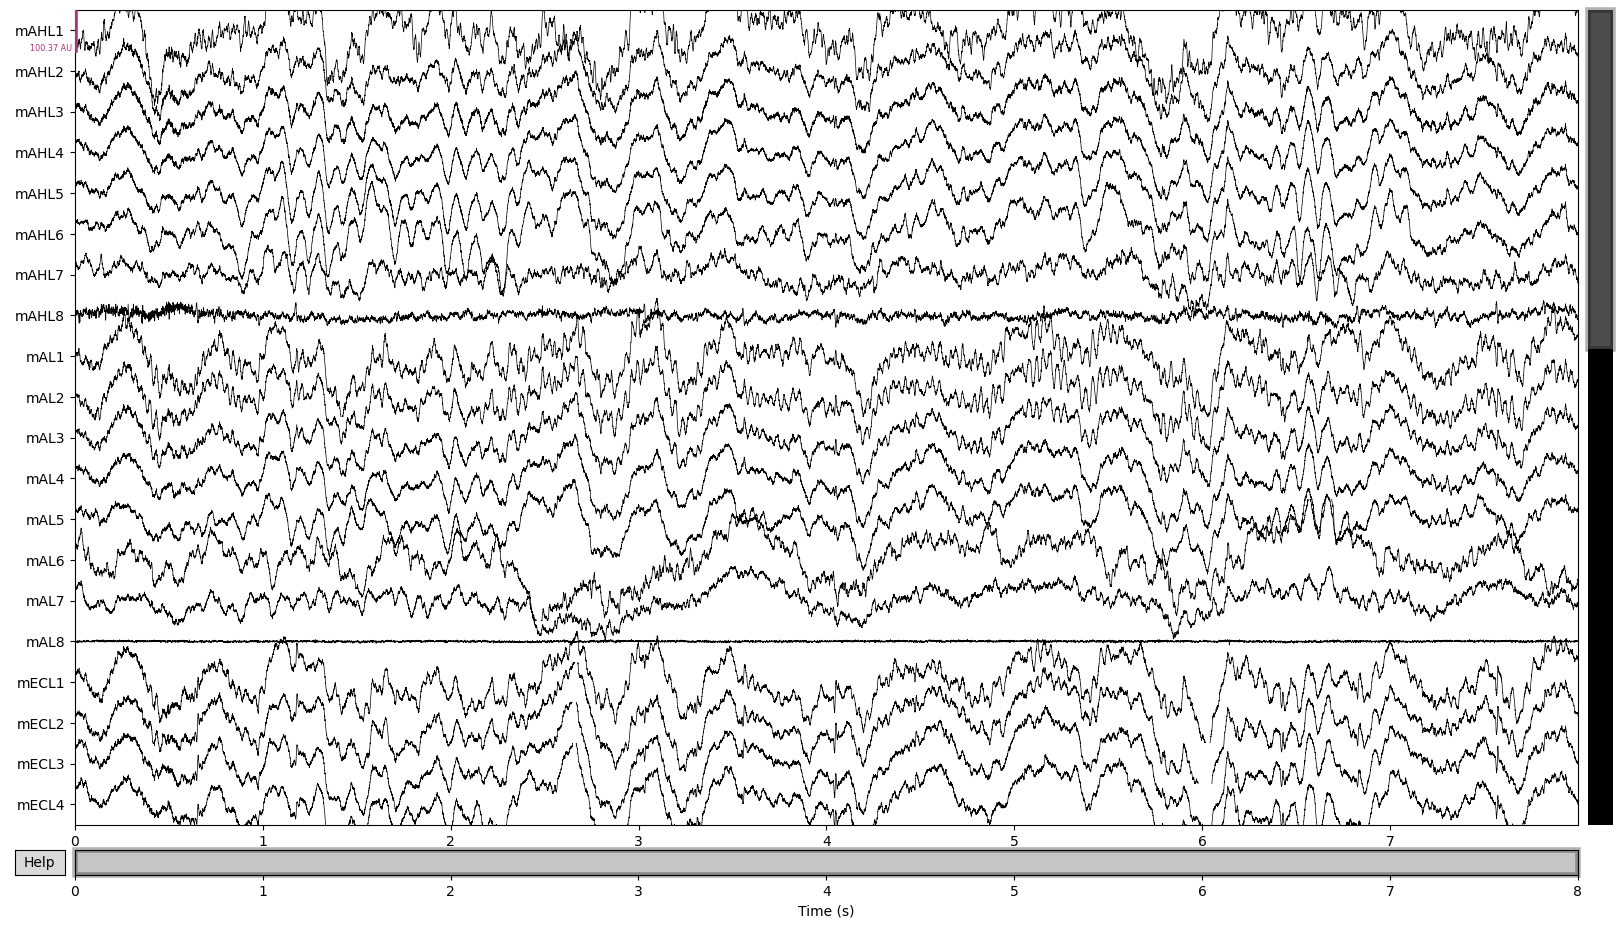

In [113]:
raw.plot()

In [102]:
frames=200
intervalMillisec = 100
contours = 0

vmax = np.max(rawArray)
vmin = -vmax

fig = plt.figure()
def animate(i):
    plt.clf()
    im, cn = mne.viz.plot_topomap(rawArray[:,i],scalpCoordinates[:,0:2], contours=contours, vmin=vmin, vmax=vmax, cmap='RdBu_r')
    plt.title(str(i))
    plt.colorbar(im)
    return im

anim = FuncAnimation(fig, animate, frames=frames, interval=intervalMillisec)

#anim.save('scalp.gif')

In [ ]:
'''
from celluloid import Camera

res = 64

vmax = np.max(rawArray)
vmin = -vmax

fig = plt.figure()
camera = Camera(fig)
for i in range(100):
    mne.viz.plot_topomap(rawArray[:,i],scalpCoordinates[:,0:2], vmin=vmin, vmax=vmax, res=res)
    plt.title(str(i))
    camera.snap()
animation = camera.animate()
animation
#animation.save('celluloid_minimal.gif', writer = 'imagemagick')
'''